<a href="https://colab.research.google.com/github/MosinInamdar/Deep-Learning-Codes-/blob/main/Deep_Learning_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0106 - val_loss: 0.0011
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 7.8943e-05 - val_loss: 8.5643e-04
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.8628e-05 - val_loss: 8.4045e-04
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 8.8890e-05 - val_loss: 8.6504e-04
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 8.8753e-05 - val_loss: 9.1063e-04
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 8.2309e-05 - val_loss: 8.3087e-04
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 7.1492e-05 - val_loss: 7.2561e-04
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 7.9958e-05 - val_loss: 7.6325e-04
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.0120e-05 - val_loss: 6.7573e-04
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 6.1798e-05 - val_loss: 6.5386e-04
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 7.1019e-05 - val_

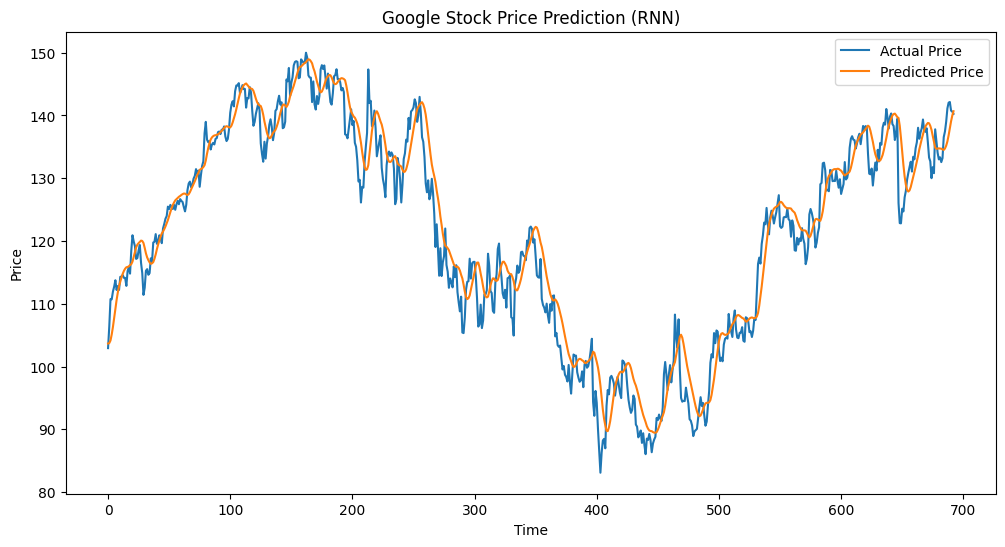

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load Google stock price data
df = yf.download("GOOG", start="2010-01-01", end="2023-12-31")
data = df[['Close']].copy()

# 2. Normalize the closing prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Create sequences of 60 time steps
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# 4. Reshape for LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 5. Split into train/test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 6. Build the RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 7. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# 8. Predict and invert scaling
y_pred = model.predict(X_test)
y_pred_scaled = scaler.inverse_transform(y_pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 9. Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(y_pred_scaled, label='Predicted Price')
plt.title('Google Stock Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
